In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sb
plt.style.use('default')
plt.rcParams['figure.figsize'] = (14, 8)

In [41]:
df = pd.read_csv("D:\PROGRAMMING\DATASETS\health care diabetes.csv")
print(df.shape)
df.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [42]:
## Independent / Dependent Variables
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

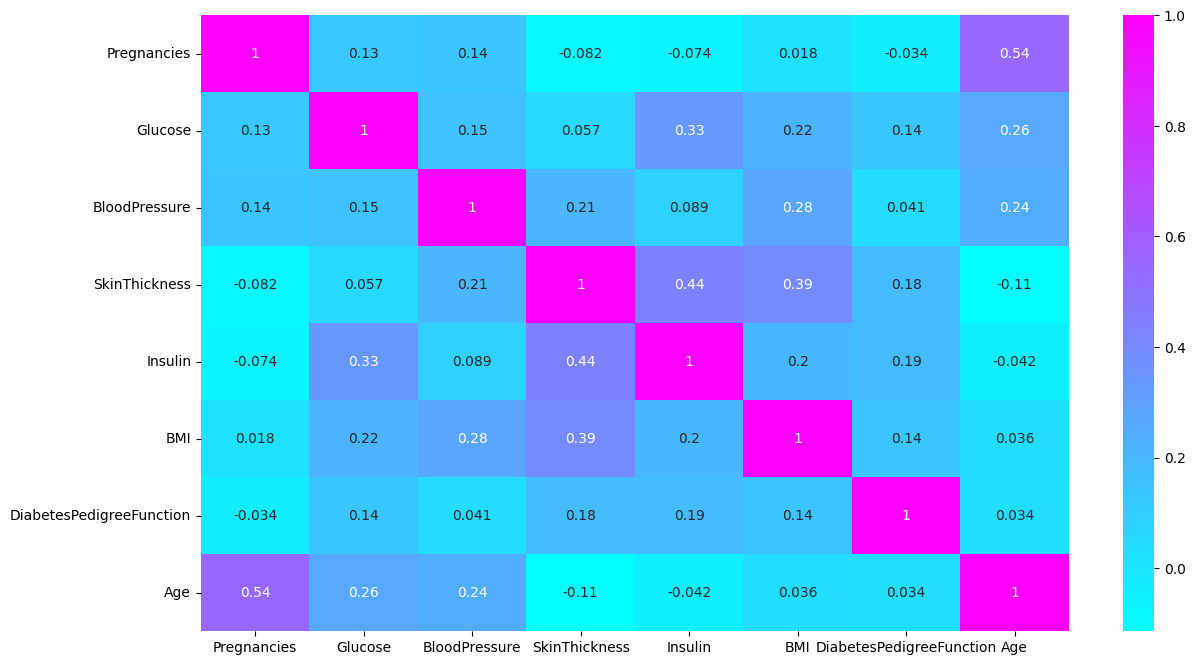

In [43]:
sb.heatmap(X.corr(), annot=True, cmap='cool')
plt.show()

In [44]:
## Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

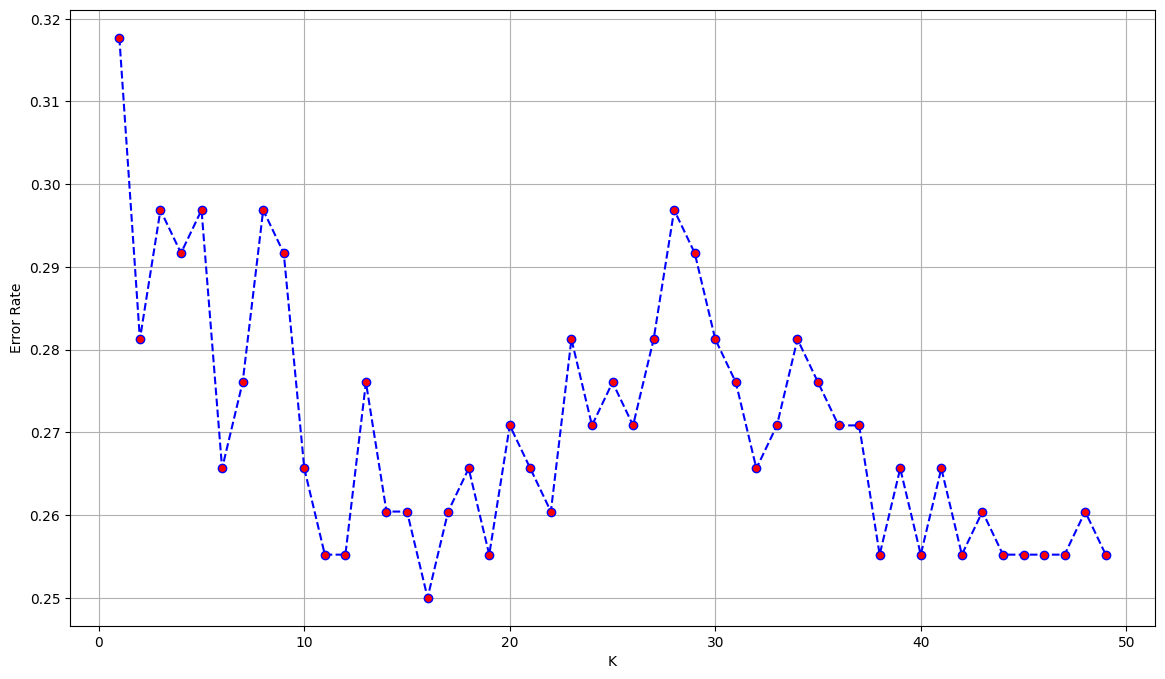


The minimum error rate :  0.25  is at  16


In [45]:
## Find the error Rate
error_rate = []
for k in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))

plt.plot(range(1, 50), error_rate, color = "blue", linestyle = 'dashed', marker = 'o',
         markerfacecolor = 'red')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()
plt.show()

min_er = min(error_rate)
min_k = error_rate.index(min_er) + 1
print("\nThe minimum error rate : ", min_er, " is at ", min_k)

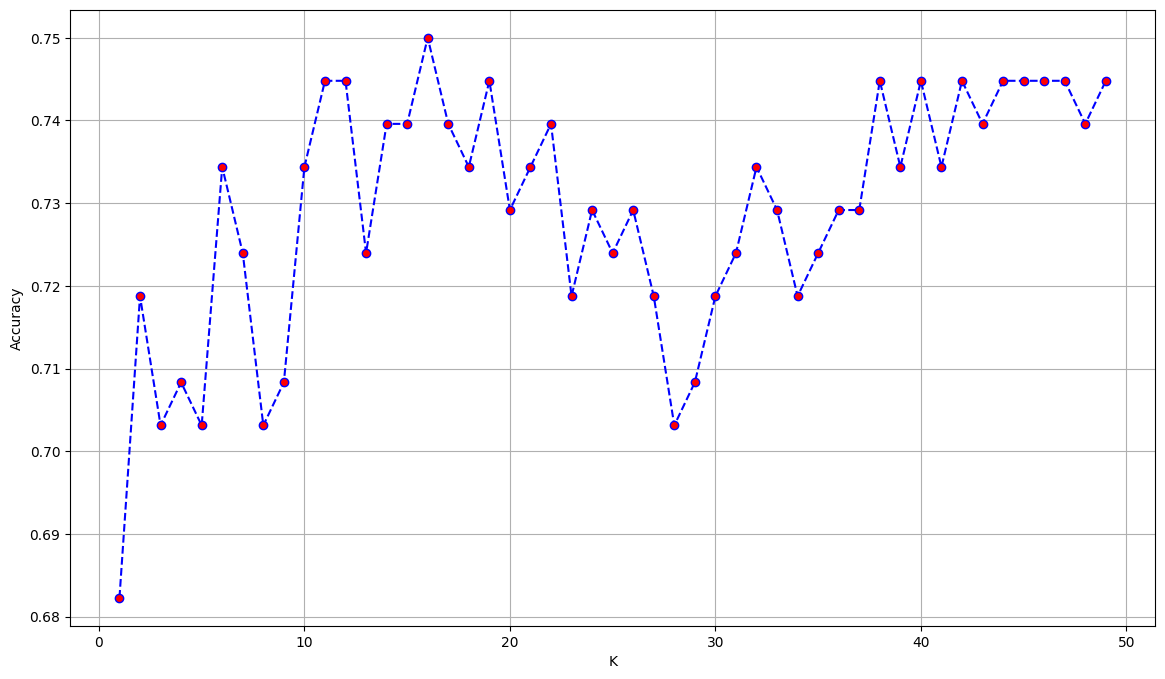


The maximum accuracy :  0.75  is at  16


In [46]:
## Finding the accuracy
acc = []
for k in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, pred_i))

plt.plot(range(1, 50), acc, color = "blue", linestyle = 'dashed', marker = 'o',
         markerfacecolor = 'red')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

max_acc = max(acc)
k_val = acc.index(max_acc) + 1
print("\nThe maximum accuracy : ", max_acc, " is at ", k_val)

In [47]:
## use standard scaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [48]:
## Train your model
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)

In [49]:
print(metrics.accuracy_score(y_test, y_predict))

0.703125


In [50]:
print(metrics.confusion_matrix(y_test, y_predict))

[[110  22]
 [ 35  25]]


In [52]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79       132
           1       0.53      0.42      0.47        60

    accuracy                           0.70       192
   macro avg       0.65      0.62      0.63       192
weighted avg       0.69      0.70      0.69       192

